# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
# from api_keys import weather_api_key
from dotenv import load_dotenv
import os

load_dotenv()
weather_api_key = os.getenv("OPEN_WEATHERMAP_API_KEY")

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#query_url = f"{url}appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | yangju
Processing Record 3 of Set 1 | mossel bay
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | dudinka
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | menongue
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | port saint john's
Processing Record 13 of Set 1 | puerto armuelles
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | ahau
City not found. Skipping...
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | hede
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,33.91,96,100,2.53,CL,1724548461
1,yangju,37.8331,127.0617,84.07,66,0,0.09,KR,1724548462
2,mossel bay,-34.1831,22.1460,54.09,74,39,2.24,ZA,1724548463
3,grytviken,-54.2811,-36.5092,25.09,78,14,11.36,GS,1724548464
4,waitangi,-43.9535,-176.5597,54.82,97,100,5.99,NZ,1724548465


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,33.91,96,100,2.53,CL,1724548461
1,yangju,37.8331,127.0617,84.07,66,0,0.09,KR,1724548462
2,mossel bay,-34.1831,22.1460,54.09,74,39,2.24,ZA,1724548463
3,grytviken,-54.2811,-36.5092,25.09,78,14,11.36,GS,1724548464
4,waitangi,-43.9535,-176.5597,54.82,97,100,5.99,NZ,1724548465


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

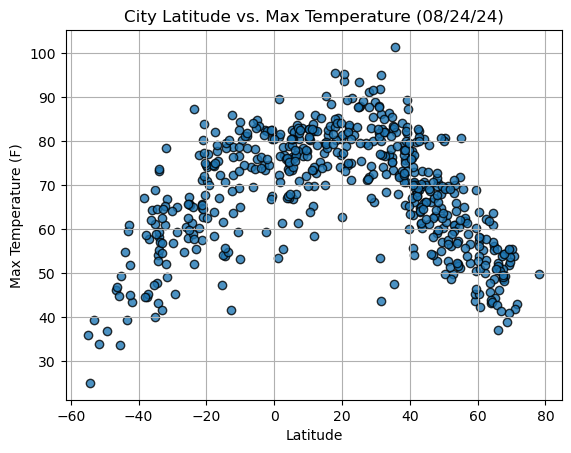

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

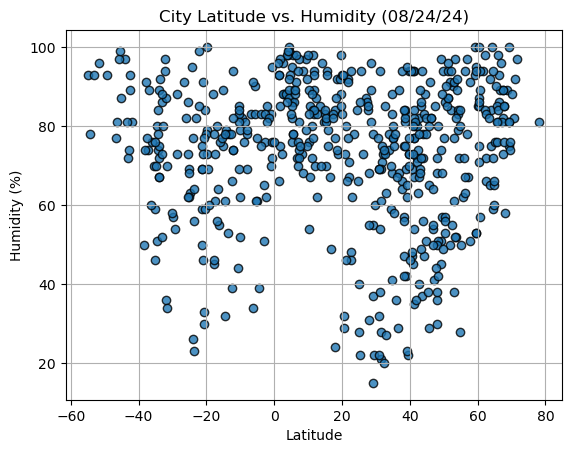

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

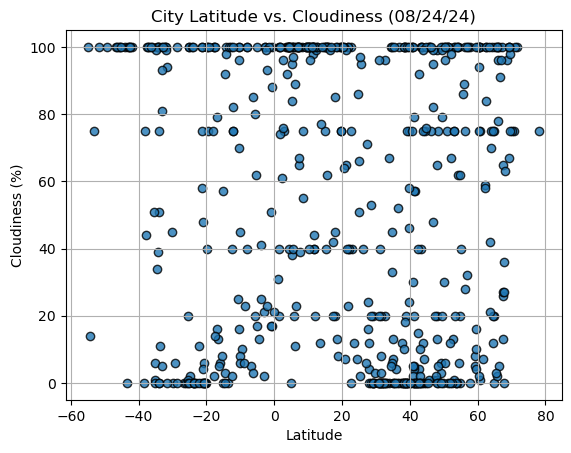

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

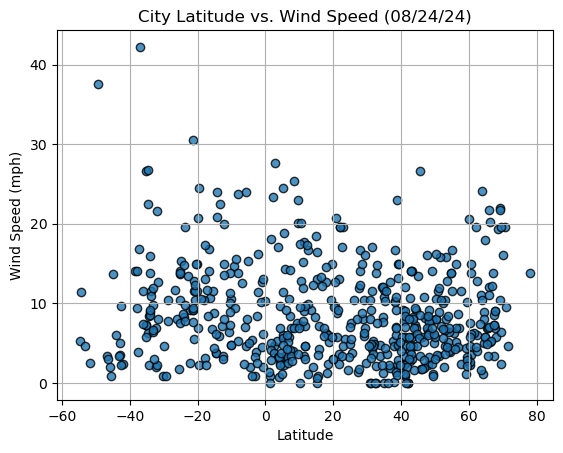

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
linear_regress = lambda x, y, title, text_coordinates: plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    linear_regress(x_values, y_values, title, text_coordinates)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(title)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yangju,37.8331,127.0617,84.07,66,0,0.09,KR,1724548462
5,wailua homesteads,22.0669,-159.3780,83.19,71,40,19.57,US,1724548466
6,dudinka,69.4058,86.1778,51.93,75,67,2.33,RU,1724548467
8,albany,42.6001,-73.9662,68.92,82,4,2.75,US,1724548470
10,kodiak,57.7900,-152.4072,56.71,51,100,11.50,US,1724548472


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,33.91,96,100,2.53,CL,1724548461
2,mossel bay,-34.1831,22.1460,54.09,74,39,2.24,ZA,1724548463
3,grytviken,-54.2811,-36.5092,25.09,78,14,11.36,GS,1724548464
4,waitangi,-43.9535,-176.5597,54.82,97,100,5.99,NZ,1724548465
7,puerto ayora,-0.7393,-90.3518,67.55,95,88,1.99,EC,1724548469


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.4718823700562903


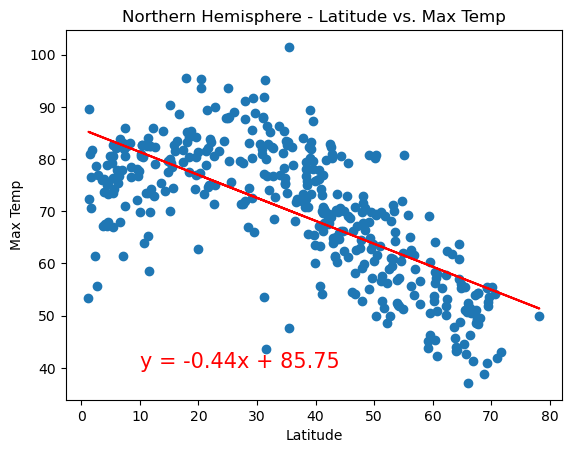

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linear_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(linear_equation, (10, 40), fontsize=15, color="red")
plt.title("Northern Hemisphere - Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig5.png")

plt.show()

The r-squared is: 0.5499082090362639


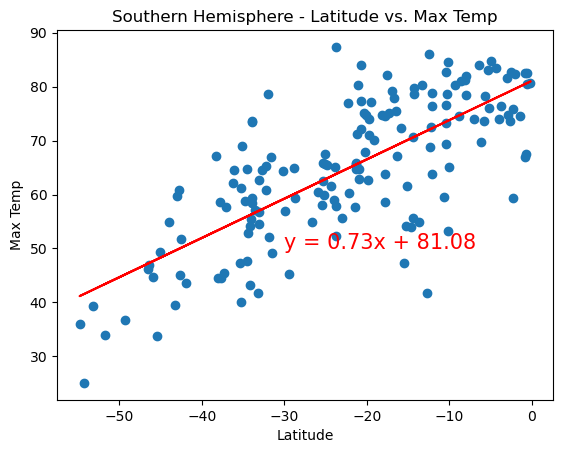

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linear_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(linear_equation, (-30, 50), fontsize=15, color="red")
plt.title("Southern Hemisphere - Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig6.png")

plt.show()

**Discussion about the linear relationship:** The temperature increases as we approach the equator (Latitude 0) and decreases as we move away from the equator.
The r-squared values is closer to 1 which indicates that the model explains a large portion of the variance in the dependent variable. This generally suggests a good fit.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0071142668854405145


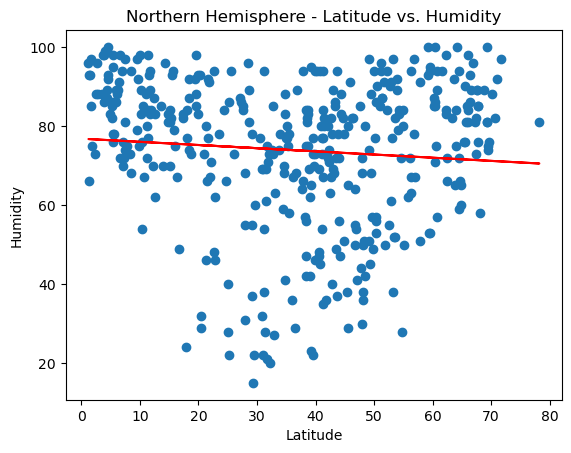

In [18]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linear_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(linear_equation, (40, 10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig7.png")

plt.show()

The r-squared is: 0.02660445087370455


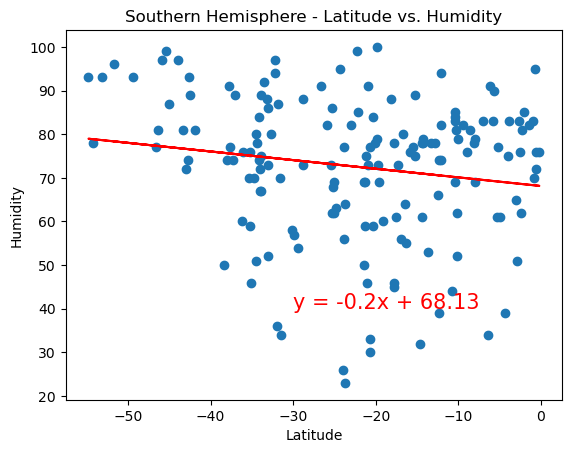

In [19]:
# Southern Hemisphere
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linear_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(linear_equation, (-30, 40), fontsize=15, color="red")
plt.title("Southern Hemisphere - Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig8.png")

plt.show()

**Discussion about the linear relationship:** 
The data shows that the humidity is lower near the equator in the Southern hemisphere.
The data shows that the humidity is higher near the equator in the Northern hemisphere.
The r-squared values is very low suggesting that the model does not do a good job of explaining the variation in the data.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.023998194521559015


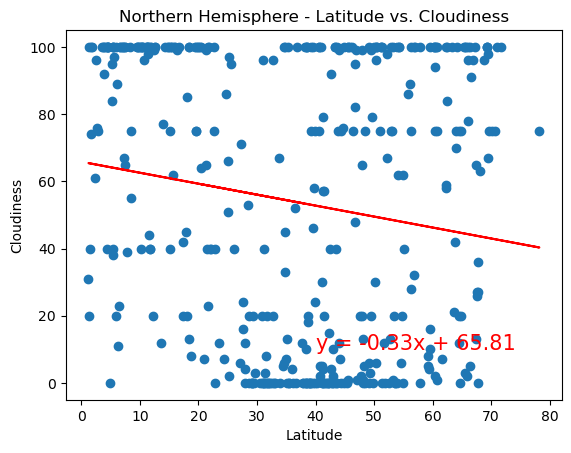

In [20]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linear_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(linear_equation, (40, 10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig9.png")

plt.show()

The r-squared is: 0.036116865273365044


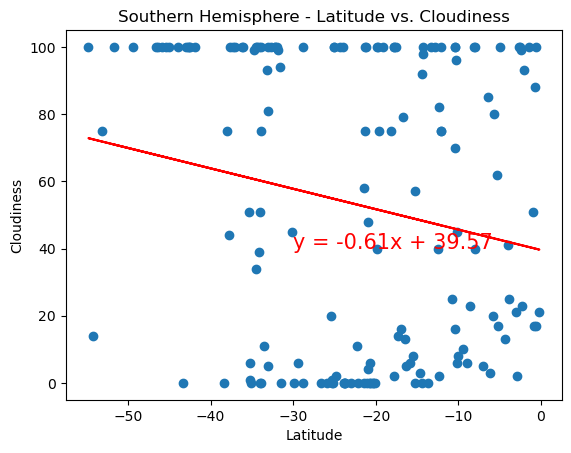

In [21]:
# Southern Hemisphere
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linear_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(linear_equation, (-30, 40), fontsize=15, color="red")
plt.title("Southern Hemisphere - Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig10.png")

plt.show()

**Discussion about the linear relationship:** 
The cloudiness is higher near the equator and decreases as we move away from the equator.
The data shows that the cloudiness is higher near the equator and lower as we move away from the equator.
The data shows that the cloudiness is higher near the equator in the Southern Hemisphere
The data shows that the cloudiness is higher near the equator and lower as we move away from the equator in the Northern Hemisphere.
The r-squared values is very low suggesting that the model does not do a good job of explaining the variation in the data.



### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0006822589999929614


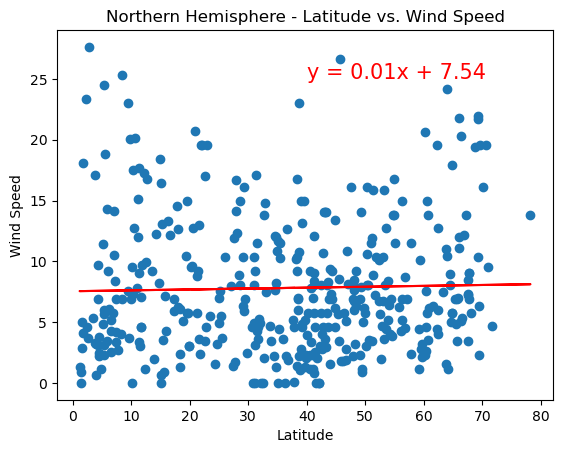

In [22]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linear_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(linear_equation, (40, 25), fontsize=15, color="red")
plt.title("Northern Hemisphere - Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig11.png")

plt.show()

The r-squared is: 0.00012491706887703108


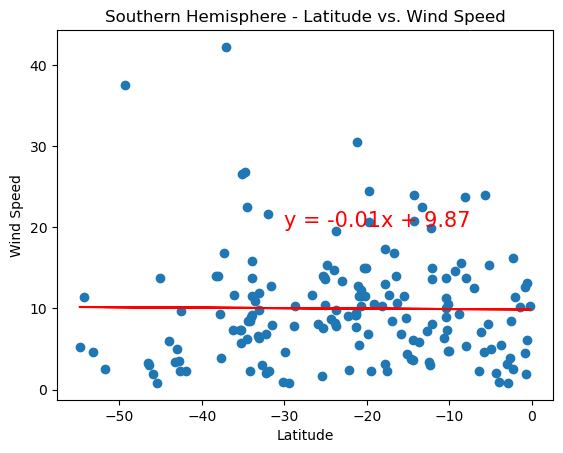

In [23]:
# Southern Hemisphere
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
linear_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(linear_equation, (-30, 20), fontsize=15, color="red")
plt.title("Southern Hemisphere - Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig12.png")

plt.show()

**Discussion about the linear relationship:** 
The data shows that the wind speed is higher near the equator and lower as we move away from the equator in the Northern Hemisphere.
The data shows that the wind speed is lower near the equator in the Southern Hemisphere.
The r-squared values is very low suggesting that the model does not do a good job of explaining the variation in the data.